In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install tensorflow==1.14.0

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn



Train on 856 samples, validate on 839 samples
Epoch 1/300
856/856 [==============================] - 2s 3ms/step - loss: 1.8750 - accuracy: 0.3563 - val_loss: 1.7925 - val_accuracy: 0.4362
Epoch 2/300
100/856 [==>...........................] - ETA: 1s - loss: 1.8362 - accuracy: 0.4100

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


856/856 [==============================] - 2s 2ms/step - loss: 1.7367 - accuracy: 0.4357 - val_loss: 1.6780 - val_accuracy: 0.4362
Epoch 3/300
856/856 [==============================] - 2s 2ms/step - loss: 1.6257 - accuracy: 0.4357 - val_loss: 1.5660 - val_accuracy: 0.4362
Epoch 4/300
856/856 [==============================] - 2s 2ms/step - loss: 1.5180 - accuracy: 0.4428 - val_loss: 1.4195 - val_accuracy: 0.5221
Epoch 5/300
856/856 [==============================] - 2s 2ms/step - loss: 1.3564 - accuracy: 0.5245 - val_loss: 1.4247 - val_accuracy: 0.5066
Epoch 6/300
856/856 [==============================] - 2s 2ms/step - loss: 1.3061 - accuracy: 0.5280 - val_loss: 1.3297 - val_accuracy: 0.5197
Epoch 7/300
856/856 [==============================] - 2s 2ms/step - loss: 1.1703 - accuracy: 0.5713 - val_loss: 1.0756 - val_accuracy: 0.5876
Epoch 8/300
856/856 [==============================] - 2s 2ms/step - loss: 1.0879 - accuracy: 0.5759 - val_loss: 1.1228 - val_accuracy: 0.5662
Epoch 9/300

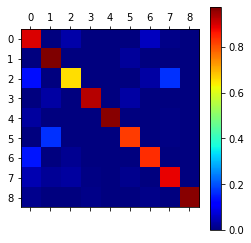

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      6368
           1       0.95      0.98      0.96     17910
           2       0.78      0.66      0.71      2016
           3       0.98      0.93      0.95      2943
           4       1.00      0.97      0.98      1292
           5       0.88      0.83      0.85      4829
           6       0.71      0.84      0.77      1278
           7       0.88      0.89      0.88      3536
           8       0.97      0.97      0.97       909

    accuracy                           0.91     41081
   macro avg       0.89      0.88      0.89     41081
weighted avg       0.91      0.91      0.91     41081

[[ 5706     0   241     1     0     0   341    60    19]
 [    0 17473     0    15     0   422     0     0     0]
 [  271     5  1323     7     0     2    68   340     0]
 [    6    99     0  2732     0    97     1     3     5]
 [   38     0     0     0  1247     0     0     7     0]
 [    0   

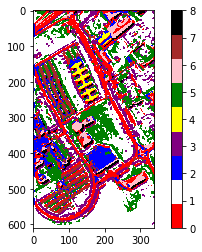

In [0]:
import gc
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical as keras_to_categorical
import numpy as np
import sys
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from operator import truediv
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from keras import regularizers

def split_data(pixels, labels, value, splitdset="sklearn", rand_state=None):
	if splitdset == "sklearn":
		X_test, X_train, y_test, y_train = \
			train_test_split(pixels, labels, test_size=value, stratify=labels, random_state=rand_state)
	elif "custom" in splitdset:
		labels = labels.reshape(-1)
		X_train = []; X_test = []; y_train = []; y_test = [];
		if "custom" == splitdset: 
			values = np.unique(value, return_counts=1)[1][1:]
			for idi, i in enumerate(values):
				samples = pixels[labels==idi+1]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		elif "custom2" == splitdset:
			for idi, i in enumerate(value):
				samples = pixels[labels==idi]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		X_train = np.array(X_train); X_test = np.array(X_test)
		y_train = np.array(y_train); y_test = np.array(y_test)
		X_train, y_train = random_unison(X_train,y_train, rstate=rand_state)
	return X_train, X_test, y_train, y_test



def get_model_compiled(shapeinput, num_class, w_decay=0):
	clf = Sequential()
	clf.add(Conv2D(50, kernel_size=(5, 5), input_shape=shapeinput))
	clf.add(Activation('relu'))
	clf.add(Conv2D(100, (5, 5)))
	clf.add(Activation('relu'))
	clf.add(MaxPooling2D(pool_size=(2, 2)))
	clf.add(Flatten())
	clf.add(Dense(100, kernel_regularizer=regularizers.l2(w_decay)))
	clf.add(Activation('relu'))
	clf.add(Dense(num_class, activation='softmax'))
	clf.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
	return clf



def AA_andEachClassAccuracy(confusion_matrix):
	counter = confusion_matrix.shape[0]
	list_diag = np.diag(confusion_matrix)
	list_raw_sum = np.sum(confusion_matrix, axis=1)
	each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
	average_acc = np.mean(each_acc)
	return each_acc, average_acc




def reports(y_pred, y_test):
	classification = classification_report(y_test, y_pred)
	oa = accuracy_score(y_test, y_pred)
	confusion = confusion_matrix(y_test, y_pred)
	each_acc, aa = AA_andEachClassAccuracy(confusion)
	kappa = cohen_kappa_score(y_test, y_pred)
	return classification, confusion, np.array([oa, aa, kappa] + list(each_acc)) * 100


def padWithZeros(X, margin=2):
	newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
	x_offset = margin
	y_offset = margin
	newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
	return newX
	# ALERT: TRY THIS
	#import cv2
	# return cv2.copyMakeBorder(X, margin, margin, margin, margin, cv2.BORDER_REPLICATE)


def createImageCubes(X, y, windowSize=19, removeZeroLabels = True):
	margin = int((windowSize - 1) / 2)
	zeroPaddedX = padWithZeros(X, margin=margin)
	patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
	patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
	patchIndex = 0
	for r in range(margin, zeroPaddedX.shape[0] - margin):
		for c in range(margin, zeroPaddedX.shape[1] - margin):
			patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]
			patchesData[patchIndex, :, :, :] = patch
			patchesLabels[patchIndex] = y[r-margin, c-margin]
			patchIndex = patchIndex + 1
	if removeZeroLabels:
		patchesData = patchesData[patchesLabels>0,:,:,:]
		patchesLabels = patchesLabels[patchesLabels>0]
		patchesLabels -= 1
	return patchesData, patchesLabels.astype("int")











data = sio.loadmat('/content/drive/My Drive/payanname/hyper resolution/deep/paviaU.mat')['paviaU']
labels = sio.loadmat('/content/drive/My Drive/payanname/hyper resolution/deep/paviaU_gt.mat')['paviaU_gt']

num_components=20
shapeor = data.shape
data = data.reshape(-1, data.shape[-1])
data = PCA(n_components=num_components).fit_transform(data)
shapeor = np.array(shapeor)
shapeor[-1] = num_components



data = MinMaxScaler().fit_transform(data)

pixels = data.reshape(shapeor)




pixel, labels = createImageCubes(pixels, labels,  removeZeroLabels = False)




pixels = pixel[labels!=0]
labels = labels[labels!=0] - 1



x_train, x_test, y_train, y_test = \
				split_data(pixels, labels, 0.02, rand_state=None)

x_val, x_test, y_val, y_test = \
				split_data(x_test, y_test, 0.02, rand_state=None)


num_class = 9 
inputshape = x_train.shape[1:]
clf = get_model_compiled(inputshape, num_class)
valdata = (x_val, keras_to_categorical(y_val, num_class))
clf.fit(x_train, keras_to_categorical(y_train, num_class),
						batch_size=100,
						epochs=300,
						
						validation_data=valdata,
						callbacks = [ModelCheckpoint(filepath="/content/drive/My Drive/payanname/hyper resolution/deep/my_model.h5", monitor='val_acc', verbose=0, save_best_only=True)])
  

print("PARAMETERS", clf.count_params())
  
stats = reports(np.argmax(clf.predict(x_test), axis=1), y_test)

conf_mx = stats[1].astype('float') / stats[1].sum(axis=1)[:, np.newaxis]
plt.matshow(conf_mx, cmap='jet')
plt.colorbar()
plt.show()

print(stats[0])
print(stats[1])
print(stats[2])






fig = plt.figure()



ax=np.argmax(clf.predict(pixel), axis=1)

colors = ['red','white','blue','purple','yellow','green','pink','brown','black']

some_digit_image = np.reshape(ax, (610, 340))
plt.imshow(some_digit_image,  cmap=mpl.colors.ListedColormap(colors), interpolation="nearest",aspect='equal')
plt.axis("scaled")

plt.colorbar()
plt.show()
fig.savefig('/content/drive/My Drive/payanname/cnn2.png', bbox_inches='tight', pad_inches=0.0, dpi=200)




Train on 3921 samples, validate on 86 samples
Epoch 1/300
3921/3921 [==============================] - 8s 2ms/step - loss: 2.0040 - accuracy: 0.1969 - val_loss: 1.5313 - val_accuracy: 0.2093
Epoch 2/300
 100/3921 [..............................] - ETA: 7s - loss: 1.5079 - accuracy: 0.4100

/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


3921/3921 [==============================] - 8s 2ms/step - loss: 1.1747 - accuracy: 0.5402 - val_loss: 1.1191 - val_accuracy: 0.5814
Epoch 3/300
3921/3921 [==============================] - 8s 2ms/step - loss: 0.9265 - accuracy: 0.6284 - val_loss: 1.2167 - val_accuracy: 0.4884
Epoch 4/300
3921/3921 [==============================] - 8s 2ms/step - loss: 0.7451 - accuracy: 0.6932 - val_loss: 0.8798 - val_accuracy: 0.6279
Epoch 5/300
3921/3921 [==============================] - 8s 2ms/step - loss: 0.5806 - accuracy: 0.7564 - val_loss: 0.9476 - val_accuracy: 0.6163
Epoch 6/300
3921/3921 [==============================] - 8s 2ms/step - loss: 0.4913 - accuracy: 0.7960 - val_loss: 0.7672 - val_accuracy: 0.6977
Epoch 7/300
3921/3921 [==============================] - 8s 2ms/step - loss: 0.3929 - accuracy: 0.8360 - val_loss: 1.0590 - val_accuracy: 0.5581
Epoch 8/300
3921/3921 [==============================] - 8s 2ms/step - loss: 0.3620 - accuracy: 0.8526 - val_loss: 0.8587 - val_accuracy: 0.66

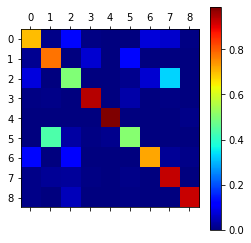

              precision    recall  f1-score   support

           0       0.87      0.70      0.77      6618
           1       0.86      0.78      0.82     18611
           2       0.44      0.50      0.47      2095
           3       0.67      0.94      0.78      3058
           4       0.95      0.99      0.97      1342
           5       0.49      0.51      0.50      5019
           6       0.59      0.73      0.65      1327
           7       0.74      0.93      0.82      3675
           8       0.94      0.93      0.93       945

    accuracy                           0.75     42690
   macro avg       0.73      0.78      0.75     42690
weighted avg       0.77      0.75      0.76     42690

[[ 4639    53   846    47     0    19   521   459    34]
 [  317 14520     1  1332     0  2427     0    14     0]
 [  175     1  1049     0     0    30   146   693     1]
 [   18    26    10  2879     0   107     1    16     1]
 [    0     0     0     0  1327     0     0     4    11]
 [    0  2

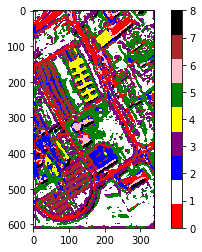

In [0]:
########################data_niyaz##############
import gc
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical as keras_to_categorical
import numpy as np
import sys
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from operator import truediv
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from keras import regularizers

def split_data(pixels, labels, value, splitdset="sklearn", rand_state=None):
	if splitdset == "sklearn":
		X_test, X_train, y_test, y_train = \
			train_test_split(pixels, labels, test_size=value, stratify=labels, random_state=rand_state)
	elif "custom" in splitdset:
		labels = labels.reshape(-1)
		X_train = []; X_test = []; y_train = []; y_test = [];
		if "custom" == splitdset: 
			values = np.unique(value, return_counts=1)[1][1:]
			for idi, i in enumerate(values):
				samples = pixels[labels==idi+1]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		elif "custom2" == splitdset:
			for idi, i in enumerate(value):
				samples = pixels[labels==idi]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		X_train = np.array(X_train); X_test = np.array(X_test)
		y_train = np.array(y_train); y_test = np.array(y_test)
		X_train, y_train = random_unison(X_train,y_train, rstate=rand_state)
	return X_train, X_test, y_train, y_test



def get_model_compiled(shapeinput, num_class, w_decay=0):
	clf = Sequential()
	clf.add(Conv2D(50, kernel_size=(5, 5), input_shape=shapeinput))
	clf.add(Activation('relu'))
	clf.add(Conv2D(100, (5, 5)))
	clf.add(Activation('relu'))
	clf.add(MaxPooling2D(pool_size=(2, 2)))
	clf.add(Flatten())
	clf.add(Dense(100, kernel_regularizer=regularizers.l2(w_decay)))
	clf.add(Activation('relu'))
	clf.add(Dense(num_class, activation='softmax'))
	clf.compile(loss=categorical_crossentropy, optimizer=Adam(), metrics=['accuracy'])
	return clf



def AA_andEachClassAccuracy(confusion_matrix):
	counter = confusion_matrix.shape[0]
	list_diag = np.diag(confusion_matrix)
	list_raw_sum = np.sum(confusion_matrix, axis=1)
	each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
	average_acc = np.mean(each_acc)
	return each_acc, average_acc




def reports(y_pred, y_test):
	classification = classification_report(y_test, y_pred)
	oa = accuracy_score(y_test, y_pred)
	confusion = confusion_matrix(y_test, y_pred)
	each_acc, aa = AA_andEachClassAccuracy(confusion)
	kappa = cohen_kappa_score(y_test, y_pred)
	return classification, confusion, np.array([oa, aa, kappa] + list(each_acc)) * 100


def padWithZeros(X, margin=2):
	newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
	x_offset = margin
	y_offset = margin
	newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
	return newX
	# ALERT: TRY THIS
	#import cv2
	# return cv2.copyMakeBorder(X, margin, margin, margin, margin, cv2.BORDER_REPLICATE)


def createImageCubes(X, y, windowSize=19, removeZeroLabels = True):
	margin = int((windowSize - 1) / 2)
	zeroPaddedX = padWithZeros(X, margin=margin)
	patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
	patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
	patchIndex = 0
	for r in range(margin, zeroPaddedX.shape[0] - margin):
		for c in range(margin, zeroPaddedX.shape[1] - margin):
			patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]
			patchesData[patchIndex, :, :, :] = patch
			patchesLabels[patchIndex] = y[r-margin, c-margin]
			patchIndex = patchIndex + 1
	if removeZeroLabels:
		patchesData = patchesData[patchesLabels>0,:,:,:]
		patchesLabels = patchesLabels[patchesLabels>0]
		patchesLabels -= 1
	return patchesData, patchesLabels.astype("int")





data = sio.loadmat('/content/drive/My Drive/payanname/hyper resolution/deep/paviaU.mat')['paviaU']
y_train = sio.loadmat('/content/drive/My Drive/payanname/hyper resolution/deep/train.mat')['TRAIN']
y_test = sio.loadmat('/content/drive/My Drive/payanname/hyper resolution/deep/test.mat')['TEST']


num_components=20
shapeor = data.shape
data = data.reshape(-1, data.shape[-1])
data = PCA(n_components=num_components).fit_transform(data)
shapeor = np.array(shapeor)
shapeor[-1] = num_components



data = MinMaxScaler().fit_transform(data)

pixels = data.reshape(shapeor)

pixels, y_test = createImageCubes(pixels, y_test,  removeZeroLabels = False)





y_train = y_train.reshape(-1)
x_train = pixels[y_train!=0]
y_train = y_train[y_train!=0] - 1

y_test = y_test.reshape(-1)
x_test = pixels[y_test!=0]
y_test = y_test[y_test!=0] - 1




x_val, x_test, y_val, y_test = \
				split_data(x_test, y_test, 0.002, rand_state=None)





num_class = 9 
inputshape = x_train.shape[1:]
clf = get_model_compiled(inputshape, num_class)
valdata = (x_val, keras_to_categorical(y_val, num_class))
clf.fit(x_train, keras_to_categorical(y_train, num_class),
						batch_size=100,
						epochs=300,
						
						validation_data=valdata,
						callbacks = [ModelCheckpoint(filepath="/content/drive/My Drive/payanname/hyper resolution/deep/my_model.h5", monitor='val_acc', verbose=0, save_best_only=True)])
  

print("PARAMETERS", clf.count_params())
  
stats = reports(np.argmax(clf.predict(x_test), axis=1), y_test)

conf_mx = stats[1].astype('float') / stats[1].sum(axis=1)[:, np.newaxis]
plt.matshow(conf_mx, cmap='jet')
plt.colorbar()
plt.show()

print(stats[0])
print(stats[1])
print(stats[2])






fig = plt.figure()



ax=np.argmax(clf.predict(pixels), axis=1)

colors = ['red','white','blue','purple','yellow','green','pink','brown','black']

some_digit_image = np.reshape(ax, (610, 340))
plt.imshow(some_digit_image,  cmap=mpl.colors.ListedColormap(colors), interpolation="nearest",aspect='equal')
plt.axis("scaled")

plt.colorbar()
plt.show()
fig.savefig('/content/drive/My Drive/payanname/cnn2.png', bbox_inches='tight', pad_inches=0.0, dpi=200)


In [3]:
import gc
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.layers import Activation, BatchNormalization, Conv3D, Dense, Flatten, MaxPooling3D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical as keras_to_categorical
import numpy as np
import sys
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from operator import truediv
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from keras import regularizers

def split_data(pixels, labels, value, splitdset="sklearn", rand_state=None):
	if splitdset == "sklearn":
		X_test, X_train, y_test, y_train = \
			train_test_split(pixels, labels, test_size=value, stratify=labels, random_state=rand_state)
	elif "custom" in splitdset:
		labels = labels.reshape(-1)
		X_train = []; X_test = []; y_train = []; y_test = [];
		if "custom" == splitdset: 
			values = np.unique(value, return_counts=1)[1][1:]
			for idi, i in enumerate(values):
				samples = pixels[labels==idi+1]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		elif "custom2" == splitdset:
			for idi, i in enumerate(value):
				samples = pixels[labels==idi]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		X_train = np.array(X_train); X_test = np.array(X_test)
		y_train = np.array(y_train); y_test = np.array(y_test)
		X_train, y_train = random_unison(X_train,y_train, rstate=rand_state)
	return X_train, X_test, y_train, y_test



def get_model_compiled(shapeinput, num_class, w_decay=0, lr=1e-3):
    clf = Sequential()
    clf.add(Conv3D(32, kernel_size=(5, 5, 5), input_shape=shapeinput))
    clf.add(BatchNormalization())
    clf.add(Activation('relu'))
    clf.add(Conv3D(64, (5, 5, 4)))
    clf.add(BatchNormalization())
    clf.add(Activation('relu'))
    clf.add(MaxPooling3D(pool_size=(2, 2, 1)))
    clf.add(Flatten())
    clf.add(Dense(300, kernel_regularizer=regularizers.l2(w_decay)))
    clf.add(BatchNormalization())
    clf.add(Activation('relu'))
    clf.add(Dense(num_class, activation='softmax'))
    clf.compile(loss=categorical_crossentropy, optimizer=Adam(lr=lr), metrics=['accuracy'])
    return clf



def AA_andEachClassAccuracy(confusion_matrix):
	counter = confusion_matrix.shape[0]
	list_diag = np.diag(confusion_matrix)
	list_raw_sum = np.sum(confusion_matrix, axis=1)
	each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
	average_acc = np.mean(each_acc)
	return each_acc, average_acc




def reports(y_pred, y_test):
	classification = classification_report(y_test, y_pred)
	oa = accuracy_score(y_test, y_pred)
	confusion = confusion_matrix(y_test, y_pred)
	each_acc, aa = AA_andEachClassAccuracy(confusion)
	kappa = cohen_kappa_score(y_test, y_pred)
	return classification, confusion, np.array([oa, aa, kappa] + list(each_acc)) * 100


def padWithZeros(X, margin=2):
	newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
	x_offset = margin
	y_offset = margin
	newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
	return newX
	# ALERT: TRY THIS
	#import cv2
	# return cv2.copyMakeBorder(X, margin, margin, margin, margin, cv2.BORDER_REPLICATE)


def createImageCubes(X, y, windowSize=19, removeZeroLabels = True):
	margin = int((windowSize - 1) / 2)
	zeroPaddedX = padWithZeros(X, margin=margin)
	patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
	patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
	patchIndex = 0
	for r in range(margin, zeroPaddedX.shape[0] - margin):
		for c in range(margin, zeroPaddedX.shape[1] - margin):
			patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]
			patchesData[patchIndex, :, :, :] = patch
			patchesLabels[patchIndex] = y[r-margin, c-margin]
			patchIndex = patchIndex + 1
	if removeZeroLabels:
		patchesData = patchesData[patchesLabels>0,:,:,:]
		patchesLabels = patchesLabels[patchesLabels>0]
		patchesLabels -= 1
	return patchesData, patchesLabels.astype("int")











data = sio.loadmat('/content/drive/My Drive/payanname/hyper resolution/deep/paviaU.mat')['paviaU']
labels = sio.loadmat('/content/drive/My Drive/payanname/hyper resolution/deep/paviaU_gt.mat')['paviaU_gt']

num_components=20
shapeor = data.shape
data = data.reshape(-1, data.shape[-1])
data = PCA(n_components=num_components).fit_transform(data)
shapeor = np.array(shapeor)
shapeor[-1] = num_components



data = MinMaxScaler().fit_transform(data)

pixels = data.reshape(shapeor)




pixel, labels = createImageCubes(pixels, labels,  removeZeroLabels = False)




pixels = pixel[labels!=0]
labels = labels[labels!=0] - 1
pixel   = pixel[..., np.newaxis]


x_train, x_test, y_train, y_test = \
				split_data(pixels, labels, 0.02, rand_state=None)

x_val, x_test, y_val, y_test = \
				split_data(x_test, y_test, 0.02, rand_state=None)


x_val   = x_val[..., np.newaxis]
x_test  = x_test[..., np.newaxis]
x_train = x_train[..., np.newaxis]




num_class = 9 
inputshape = x_train.shape[1:]
clf = get_model_compiled(inputshape, num_class)
valdata = (x_val, keras_to_categorical(y_val, num_class))
clf.fit(x_train, keras_to_categorical(y_train, num_class),
						batch_size=100,
						epochs=100,
						
						validation_data=valdata,
						callbacks = [ModelCheckpoint(filepath="/content/drive/My Drive/payanname/hyper resolution/deep/my_model.h5", monitor='val_acc', verbose=0, save_best_only=True)])
  

print("PARAMETERS", clf.count_params())
  
stats = reports(np.argmax(clf.predict(x_test), axis=1), y_test)

conf_mx = stats[1].astype('float') / stats[1].sum(axis=1)[:, np.newaxis]
plt.matshow(conf_mx, cmap='jet')
plt.colorbar()
plt.show()

print(stats[0])
print(stats[1])
print(stats[2])






fig = plt.figure()



ax=np.argmax(clf.predict(pixel), axis=1)

colors = ['red','white','blue','purple','yellow','green','pink','brown','black']

some_digit_image = np.reshape(ax, (610, 340))
plt.imshow(some_digit_image,  cmap=mpl.colors.ListedColormap(colors), interpolation="nearest",aspect='equal')
plt.axis("scaled")

plt.colorbar()
plt.show()
fig.savefig('/content/drive/My Drive/payanname/cnn3.png', bbox_inches='tight', pad_inches=0.0, dpi=200)


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn


Train on 856 samples, validate on 839 samples
Epoch 1/100
300/856 [=========>....................] - ETA: 27s - loss: 2.3214 - accuracy: 0.3167

KeyboardInterrupt: ignored

In [8]:
#####final_3d
import gc
import keras.backend as K
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.losses import categorical_crossentropy
from keras.layers import Activation, BatchNormalization, Conv3D, Dense, Flatten, MaxPooling3D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.utils import to_categorical as keras_to_categorical
import numpy as np
import sys
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from operator import truediv
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from keras import regularizers
import timeit
import os

def split_data(pixels, labels, value, splitdset="sklearn", rand_state=None):
	if splitdset == "sklearn":
		X_test, X_train, y_test, y_train = \
			train_test_split(pixels, labels, test_size=value, stratify=labels, random_state=rand_state)
	elif "custom" in splitdset:
		labels = labels.reshape(-1)
		X_train = []; X_test = []; y_train = []; y_test = [];
		if "custom" == splitdset: 
			values = np.unique(value, return_counts=1)[1][1:]
			for idi, i in enumerate(values):
				samples = pixels[labels==idi+1]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		elif "custom2" == splitdset:
			for idi, i in enumerate(value):
				samples = pixels[labels==idi]
				samples = random_single(samples, rstate=rand_state)
				for a in samples[:i]: 
					X_train.append(a); y_train.append(idi)
				for a in samples[i:]:
					X_test.append(a); y_test.append(idi)
		X_train = np.array(X_train); X_test = np.array(X_test)
		y_train = np.array(y_train); y_test = np.array(y_test)
		X_train, y_train = random_unison(X_train,y_train, rstate=rand_state)
	return X_train, X_test, y_train, y_test



def get_model_compiled(shapeinput, num_class, w_decay=0, lr=1e-3):
    clf = Sequential()
    clf.add(Conv3D(32, kernel_size=(5, 5, 5), input_shape=shapeinput))
    clf.add(BatchNormalization())
    clf.add(Activation('relu'))
    clf.add(Conv3D(64, (5, 5, 4)))
    clf.add(BatchNormalization())
    clf.add(Activation('relu'))
    clf.add(MaxPooling3D(pool_size=(2, 2, 1)))
    clf.add(Flatten())
    clf.add(Dense(300, kernel_regularizer=regularizers.l2(w_decay)))
    clf.add(BatchNormalization())
    clf.add(Activation('relu'))
    clf.add(Dense(num_class, activation='softmax'))
    clf.compile(loss=categorical_crossentropy, optimizer=Adam(lr=lr), metrics=['accuracy'])
    return clf



def AA_andEachClassAccuracy(confusion_matrix):
	counter = confusion_matrix.shape[0]
	list_diag = np.diag(confusion_matrix)
	list_raw_sum = np.sum(confusion_matrix, axis=1)
	each_acc = np.nan_to_num(truediv(list_diag, list_raw_sum))
	average_acc = np.mean(each_acc)
	return each_acc, average_acc




def reports(y_pred, y_test):
	classification = classification_report(y_test, y_pred)
	oa = accuracy_score(y_test, y_pred)
	confusion = confusion_matrix(y_test, y_pred)
	each_acc, aa = AA_andEachClassAccuracy(confusion)
	kappa = cohen_kappa_score(y_test, y_pred)
	return classification, confusion, np.array([oa, aa, kappa] + list(each_acc)) * 100


def padWithZeros(X, margin=2):
	newX = np.zeros((X.shape[0] + 2 * margin, X.shape[1] + 2* margin, X.shape[2]))
	x_offset = margin
	y_offset = margin
	newX[x_offset:X.shape[0] + x_offset, y_offset:X.shape[1] + y_offset, :] = X
	return newX
	# ALERT: TRY THIS
	#import cv2
	# return cv2.copyMakeBorder(X, margin, margin, margin, margin, cv2.BORDER_REPLICATE)


def createImageCubes(X, y, windowSize=19, removeZeroLabels = True):
	margin = int((windowSize - 1) / 2)
	zeroPaddedX = padWithZeros(X, margin=margin)
	patchesData = np.zeros((X.shape[0] * X.shape[1], windowSize, windowSize, X.shape[2]))
	patchesLabels = np.zeros((X.shape[0] * X.shape[1]))
	patchIndex = 0
	for r in range(margin, zeroPaddedX.shape[0] - margin):
		for c in range(margin, zeroPaddedX.shape[1] - margin):
			patch = zeroPaddedX[r - margin:r + margin + 1, c - margin:c + margin + 1]
			patchesData[patchIndex, :, :, :] = patch
			patchesLabels[patchIndex] = y[r-margin, c-margin]
			patchIndex = patchIndex + 1
	if removeZeroLabels:
		patchesData = patchesData[patchesLabels>0,:,:,:]
		patchesLabels = patchesLabels[patchesLabels>0]
		patchesLabels -= 1
	return patchesData, patchesLabels.astype("int")







x_train=np.load(os.path.join('/content/drive/My Drive/payanname/hyper resolution/train_test_data/20percent', 'x_train_3Cubes_20.npy'))
y_train=np.load(os.path.join('/content/drive/My Drive/payanname/hyper resolution/train_test_data/20percent', 'y_train_3Cubes_20.npy'))
x_test=np.load(os.path.join('/content/drive/My Drive/payanname/hyper resolution/train_test_data/20percent', 'x_test_3Cubes_20.npy'))
y_test=np.load(os.path.join('/content/drive/My Drive/payanname/hyper resolution/train_test_data/20percent', 'y_test_3Cubes_20.npy'))






x_val, x_test, y_val, y_test = \
				split_data(x_test, y_test, 0.02, rand_state=None)







num_class = 9 
inputshape = x_train.shape[1:]
start = timeit.default_timer()
clf = get_model_compiled(inputshape, num_class)
valdata = (x_val, keras_to_categorical(y_val, num_class))
clf.fit(x_train, keras_to_categorical(y_train, num_class),
						batch_size=100,
						epochs=100,
						
						validation_data=valdata,
						callbacks = [ModelCheckpoint(filepath="/content/drive/My Drive/payanname/hyper resolution/deep/best_model.h5", monitor='val_acc', verbose=0, save_best_only=True)])
  

stop = timeit.default_timer()

print('Time: ', stop - start) 

clf.save('/content/drive/My Drive/payanname/hyper resolution/deep/best_model.h5')
print("PARAMETERS", clf.count_params())
  
stats = reports(np.argmax(clf.predict(x_test), axis=1), y_test)

conf_mx = stats[1].astype('float') / stats[1].sum(axis=1)[:, np.newaxis]
plt.matshow(conf_mx, cmap='jet')
plt.colorbar()
plt.show()

print(stats[0])
print(stats[1])
print(stats[2])





Train on 8556 samples, validate on 685 samples
Epoch 1/100
8556/8556 [==============================] - 407s 48ms/step - loss: 0.2621 - accuracy: 0.9226 - val_loss: 14.1144 - val_accuracy: 0.4365
Epoch 2/100


/usr/local/lib/python3.6/dist-packages/keras/callbacks/callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


8556/8556 [==============================] - 407s 48ms/step - loss: 0.0570 - accuracy: 0.9867 - val_loss: 13.5175 - val_accuracy: 0.4365
Epoch 3/100
8556/8556 [==============================] - 408s 48ms/step - loss: 0.0347 - accuracy: 0.9929 - val_loss: 6.7993 - val_accuracy: 0.4394
Epoch 4/100
8556/8556 [==============================] - 405s 47ms/step - loss: 0.0156 - accuracy: 0.9973 - val_loss: 5.9121 - val_accuracy: 0.4876
Epoch 5/100
8556/8556 [==============================] - 407s 48ms/step - loss: 0.0254 - accuracy: 0.9950 - val_loss: 6.9442 - val_accuracy: 0.5182
Epoch 6/100
8556/8556 [==============================] - 408s 48ms/step - loss: 0.0109 - accuracy: 0.9982 - val_loss: 3.9508 - val_accuracy: 0.2161
Epoch 7/100
8556/8556 [==============================] - 410s 48ms/step - loss: 0.0103 - accuracy: 0.9980 - val_loss: 0.6044 - val_accuracy: 0.7474
Epoch 8/100
8556/8556 [==============================] - 406s 47ms/step - loss: 0.0030 - accuracy: 0.9999 - val_loss: 0.266

KeyboardInterrupt: ignored